<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-MCoronaTec/blob/main/A01793016_MarioCorona_DataAnalysis_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python
# Modulo 3

**Nombre:** Mario Alberto Corona Cadenas

**Matrícula:** A01793016

# Eplory Data Analysis

Este modulo cubre los siguiente tópicos:

- Resumir las principales características de los datos
- Tener un mejor entendimiento del data set
- Descubir las relaciones que existen entre las variables
- Extraer variables importante
- Estadísticas Descriptivas
- `GroupBy`
- ANOVA
- Correlación

# Estadísticas Descriptivas

Las estadísticas descriptivas ayudan a dar un entendimiento de los datos que componen un data se. Aquí se describen algunas funcionalides básicas de que permiten explorar los datas sets de na manera sencilla y rápida.

# `describe()`

Este es un método de pandas que provee de las princiapales métricas de un data set. Las siguiente son las metricas que despiega:

- `cout`
- `mean`
- `std`
- `25%`
- `75%`
- `max`

# `value_counts()` 

Esta función ayuda proveyendo un resumen en la variables categóricas. Da un conteo de cada categoria

*e.i*
 ```
drive_wheels_cnt = df['drive-wheels'].value_counts()
drive_wheels_cnt.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_cnt.idenx.name = 'drive-wheels'
 
 ```

# Box plots

Las caracteristicas de los diagramas de caja y bigote son los siguiente:

- Extremos superior
- Cuartil superiror
- Media
- Cuartil inferior
- Bigote
- Extremo inferior
- Outlier 

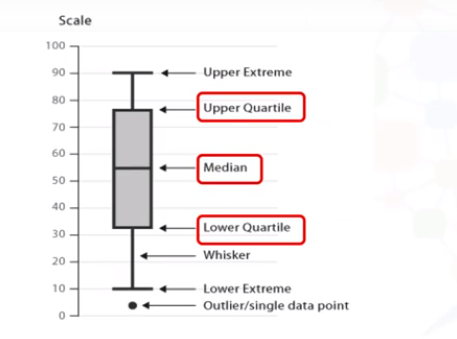

Un ejemplo para desplegar estos diagramas se muestra a continuación:
```
sns.boxplot(x='drive-wheels', y='price, data=df)
```

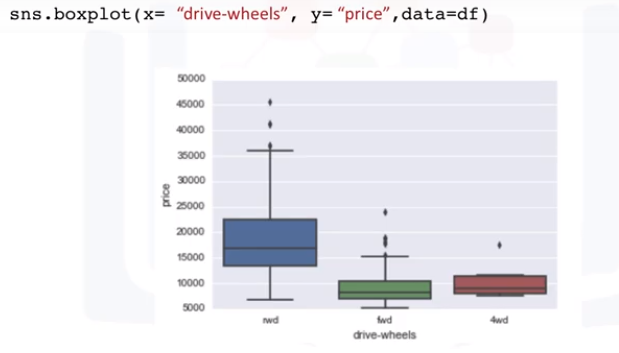

# Scatter Plot

Estos diagramas nos ayudan a ver visualmente la relación entre dos variable

1. Variable de precición/independiente en el eje $x$
2. Variable objectivo/dependiente en el eje de las $y$

```
y = df['engine-size']
x = df['price']
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlable('Engine Size')
plt.ylabel('Price)
```

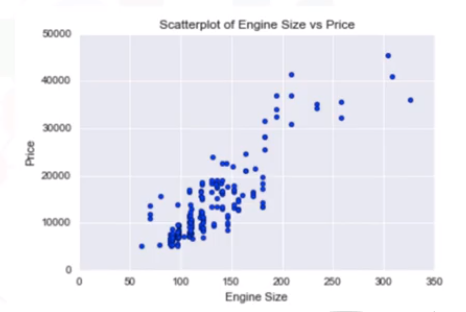

# `GroupBy()`

Este método es de la libreria de pandas y ayuda en lo siguienteÑ

- Se aplica a variables categóricAS
- Agrupa los datos en categorías
- Puede agrupar en una sola variable o en multiples variables

Por ejemplo:

Supongamos que queremos saver el precio promedio de los vehículos y observamos como difiere este dependiendo de dos variables "body-style" y "drive-wheels".

Para ello, se aislan las tres columnas que nos interesan de la siguiente manera:

```
df_test = df[['drive-wheels', 'body-style', 'price']]
```
Posteriormente reducimos los datos de acuerdo a `'drive-wheels'` y `'body-style'`. 

Ya que estamos interesados en saber como el promedio del precio varia podemos tomar el promedio de cada grupo:

```
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp
```

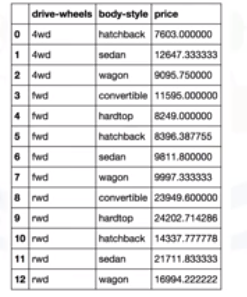

Ahora podemos observar mas facilmente que de acuerdo a los datos, *rear wheel drive* (`'rwd'`) *convertible* y *hardtop* tienen los valores más altos mientras que *four wheel drive* (`'fwd'`) *hatchbacks* tienen los valores más bajos

# Pivot Table

La tabla anterior auqnue proporciona información valiosa, no es facil de entender a primera vista. Por lo que se usa lo que se conoce como *Pivot Table*. Dicha tablas tiene las siguiente características:

- Ona variable se despliega a través de las columanas y otras a lo largo de las filas

Usando una línea de código y el método `pivot()` de la libreria de pandas, podemos *alnclar* la variable `'body-style'` para que se depliegue a lo largo de las columanas y la variable `'drive-wheels'` a lo largo de las filas.

```
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
```
Con esta línea de código, el precio se convierte ahora en una matriz rectangular la cual es más fácil de visualizar 

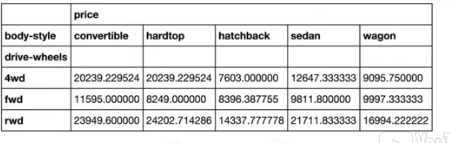

# Heatmap

Otra forma de representar los datos son con los heatmaps los cuales tomas una matriz de datos y los grafican coloreando los rectangulos basado en el valor. De esta forma es más fácil aún detectar este tipo de valores.

Por ejemplo:

```
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()
```


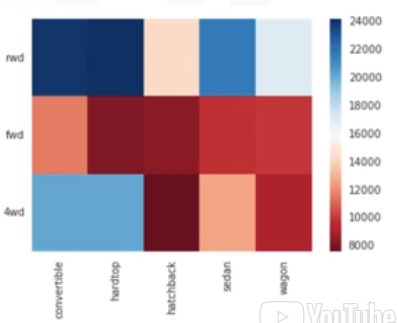

# Analysis of Variance (ANOVA)

Este es un concepto que ayudara a analizar grupos de variable categóricas y ver su correlacion.

Por ejemplo, consideremos nuestro data set y queremos preguntarnos ¿como las diferente categorías impactan en el precio? para ello asemos uso de ANOVA

ANOVA test devueke dos valores: 
- F-test score: Calcula el ratio de la variación entre el promedio de los grupos sobre la variación

- p-value: muestra si el valor obtenido es significante estadisticamente hablando (grado de confianza).

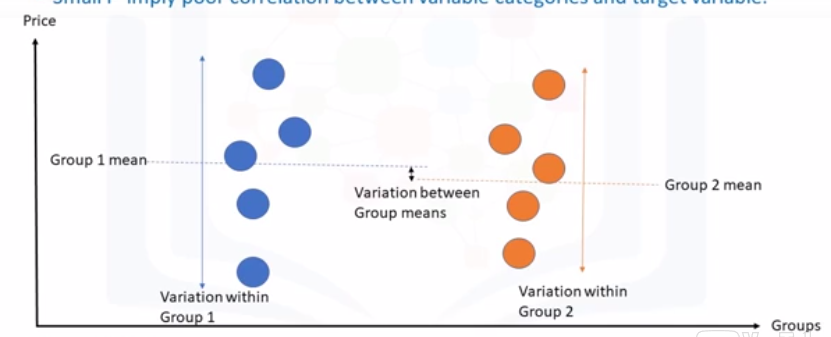

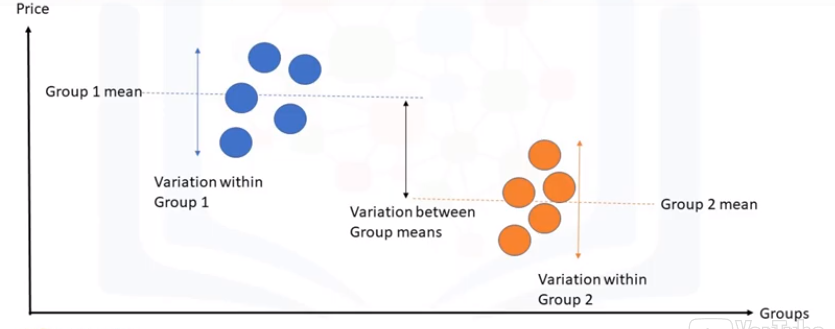

Por ejemplo:

Para obtener ANOVA usamos el el método `f_oneway` de la paquetrías Scipy.

Primero pasamos el dato del precio de dos carros (Honda y Subaru) que son los grupos que queremos comparar.

```
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupb(['make])
anova_results_l = stats.oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
```

image.png

De este resultado podemos ver que los precios entre honda y subaru no varían mucho ya que el f1-score es menor a 1 y p-vlue es mayor que 0.05

Si hacemos lo mismo para "honda" y "jaguar"
```
anova_results_l = stats.oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')
```

image.png

Debido a que f1-score es muy alto (f-1score=401) y el p-value mayor a 0.05 (p-value=1.05)

# Correlación
La correlación mide en que medida las variables son interdependientes. Sin embargo es importante resaltar que la correlación no implica causa.

Para obtener la correlación entre dos características podemos hacer uso de `regplot()` para crear un *scatter plot*

```
sns.regplot(x='engine-size', y='prices', datadf)
plt.ylim(0,)
```

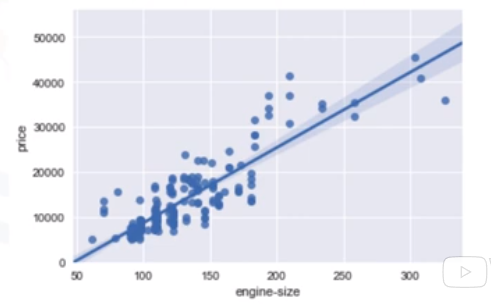

# Correlacion Pearson

Mide la fuerza de la correlación entre dos características. Devuelve dos valores:
 - Coeficiente de correlación
  - Cercano a +1: Correlación alta positiva
  - Cercanos a -1: Correlación alta negativa
  - Cercano a 0: Sin relación
 - P-value
  - p-value < 0.001: Fuerte certeza en el resultado
  - p-value < 0.05: Certeza moderada
  - p-value < 0.1: Certeza débil
  - p-value > 0.1: No hay certeza en el resultado

```
pearson_coef, p_value = stats.pearson(df['horsepower'], df['price'])
```
- Pearson correlation: 0.81
- P-value: 9.35e-48

De los resultados podemos ver que existe una fuerte correlación en las características


Ahora, si tomamos consideramos todas las variables, podemos crear un mapa de calor que nos dara el coeficiente de pearson